<a href="https://colab.research.google.com/github/Adammalik28/machine_learning/blob/main/Random_Forest_Algorithm_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, roc_curve
)
import warnings
warnings.filterwarnings("ignore")
plt.style.use('seaborn-v0_8')
matplotlib inline

METODOLOGI PENELITIAN

In [ ]:
print("\n=== METODOLOGI PENELITIAN ===")


=== METODOLOGI PENELITIAN ===


2.0 Visualisasi Flowchart Metodologi

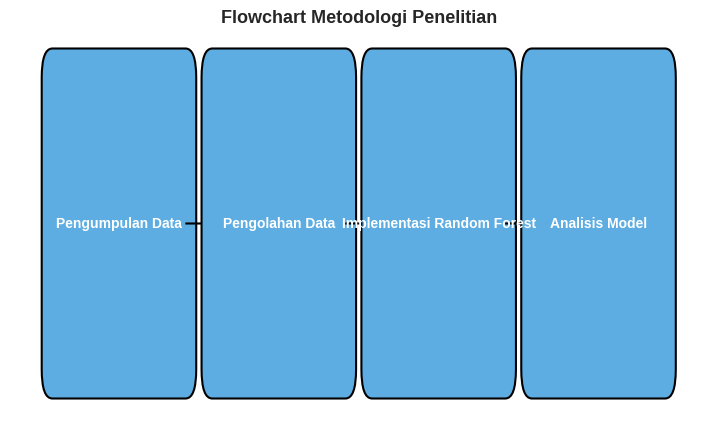

In [ ]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(9, 5))
ax.axis('off')

stages = [
    "Pengumpulan Data",
    "Pengolahan Data",
    "Implementasi Random Forest",
    "Analisis Model"
]

x_positions = [0.1, 0.4, 0.7, 1.0]
y_pos = 0.5

for i, stage in enumerate(stages):
    rect = mpatches.FancyBboxPatch(
        (x_positions[i]-0.08, y_pos-0.1), 0.25, 0.2,
        boxstyle="round,pad=0.02", fc="#5DADE2", ec="black", lw=1.5
    )
    ax.add_patch(rect)
    ax.text(x_positions[i]+0.045, y_pos, stage, ha='center', va='center',
            fontsize=10, fontweight='bold', color='white')
    if i < len(stages)-1:
        ax.arrow(
            x_positions[i]+0.17, y_pos, 0.07, 0,
            head_width=0.05, head_length=0.03, fc='black', ec='black'
        )

plt.title("Flowchart Metodologi Penelitian", fontsize=13, fontweight='bold')
plt.show()

2.1 Pengumpulan Data

In [ ]:
print("\n2.1 Pengumpulan Data")
try:
    df = pd.read_csv("/mnt/data/insurance.csv")
except:
    from google.colab import files
    uploaded = files.upload()
    df = pd.read_csv(list(uploaded.keys())[0])

print(f"Jumlah data: {df.shape[0]} baris dan {df.shape[1]} kolom.\n")
display(df.head())



2.1 Pengumpulan Data


Saving insurance.csv to insurance (1).csv
Jumlah data: 1338 baris dan 7 kolom.



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


2.2 Pengolahan Data

In [ ]:
print("\n2.2 Pengolahan Data")
print("Jumlah data kosong tiap kolom:")
print(df.isnull().sum())

# Target: smoker
X = df.drop(columns=['smoker'])
y = df['smoker'].map({'yes':1, 'no':0})

# Pisahkan kolom numerik dan kategorikal
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('ohe', OneHotEncoder(drop='first', sparse_output=False))])
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

# Split data train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Data latih: {X_train.shape[0]} baris | Data uji: {X_test.shape[0]} baris")


2.2 Pengolahan Data
Jumlah data kosong tiap kolom:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Data latih: 1070 baris | Data uji: 268 baris


2.3 Implementasi Random Forest

In [ ]:
print("\n2.3 Implementasi Random Forest")

rf_clf = Pipeline(steps=[
    ('preproc', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 5, 10, 20],
    'model__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    rf_clf, param_grid=param_grid, cv=5,
    scoring='f1', n_jobs=-1, verbose=1
)
grid_search.fit(X_train, y_train)

print("Parameter terbaik hasil GridSearchCV:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_


2.3 Implementasi Random Forest
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Parameter terbaik hasil GridSearchCV:
{'model__max_depth': 10, 'model__min_samples_split': 2, 'model__n_estimators': 300}


2.4 Analisis Model


2.4 Analisis Model (10-Fold Cross Validation)
Rata-rata F1-Score (10-Fold CV): 0.896 ± 0.026


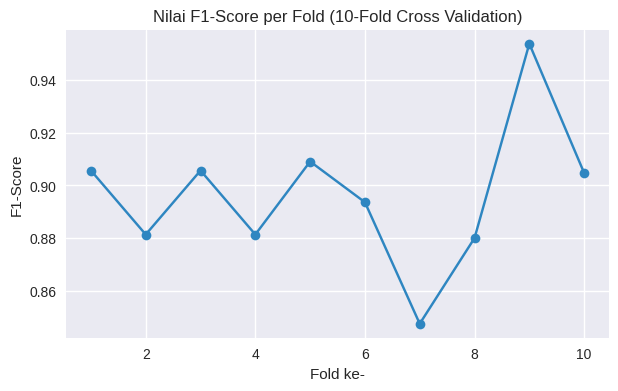

In [ ]:
print("\n2.4 Analisis Model (10-Fold Cross Validation)")
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_model, X, y, cv=kf, scoring='f1')

print(f"Rata-rata F1-Score (10-Fold CV): {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

plt.figure(figsize=(7,4))
plt.plot(range(1,11), cv_scores, marker='o', color='#2E86C1')
plt.title("Nilai F1-Score per Fold (10-Fold Cross Validation)")
plt.xlabel("Fold ke-")
plt.ylabel("F1-Score")
plt.grid(True)
plt.show()

3. HASIL DAN ANALISIS


=== HASIL DAN ANALISIS ===

Akurasi   : 0.970
Presisi   : 0.912
Recall    : 0.945
F1-Score  : 0.929
ROC-AUC   : 0.994



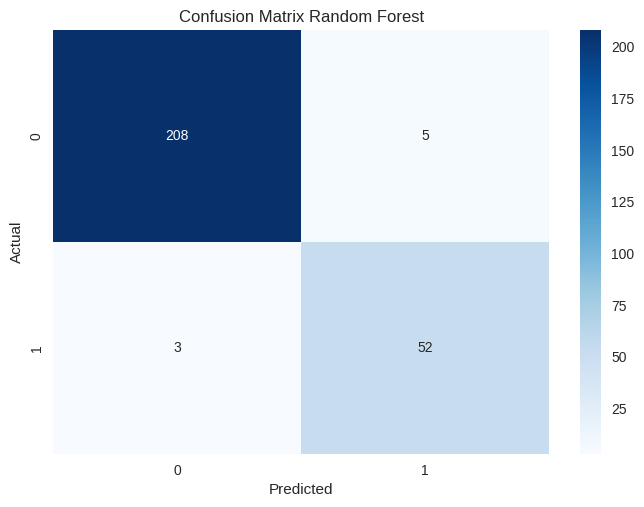

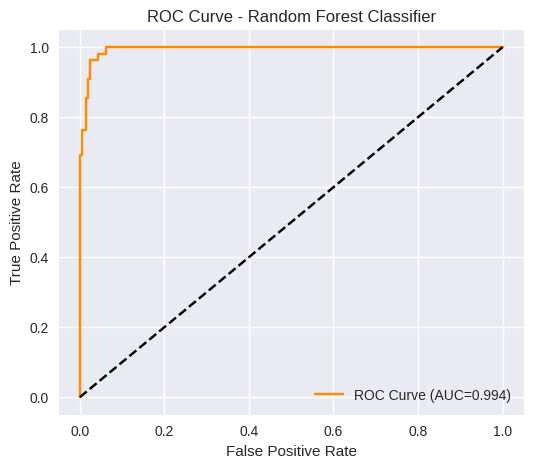

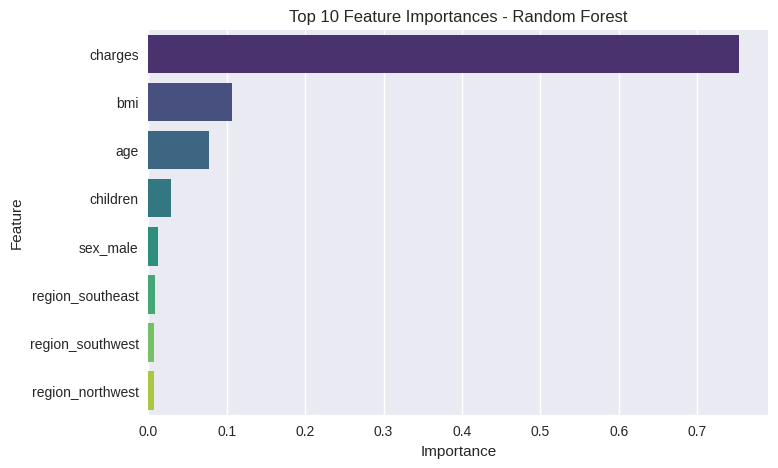


10 Fitur paling berpengaruh terhadap prediksi perokok:


,Feature,Importance
3,charges,0.753233
1,bmi,0.107042
0,age,0.076989
2,children,0.028541
4,sex_male,0.011884
6,region_southeast,0.008744
7,region_southwest,0.006954
5,region_northwest,0.006614


In [ ]:
print("\n=== HASIL DAN ANALISIS ===")

# Prediksi di data uji
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]

# Evaluasi
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)

print(f"""
Akurasi   : {acc:.3f}
Presisi   : {prec:.3f}
Recall    : {rec:.3f}
F1-Score  : {f1:.3f}
ROC-AUC   : {roc:.3f}
""")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc:.3f})", color='darkorange')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest Classifier")
plt.legend()
plt.show()

# Feature Importance
rf_model = best_model.named_steps['model']
ohe = best_model.named_steps['preproc'].named_transformers_['cat'].named_steps['ohe']
cat_names = ohe.get_feature_names_out(cat_cols)
feat_names = num_cols + list(cat_names)
importances = rf_model.feature_importances_

feat_imp = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp.head(10), palette='viridis')
plt.title("Top 10 Feature Importances - Random Forest")
plt.show()

print("\n10 Fitur paling berpengaruh terhadap prediksi perokok:")
display(feat_imp.head(10))